In [46]:
import openmm
from importlib import reload
repo_path = "../../"
sys.path.append(repo_path)
from enhanced_sampling import utils, system_building as sb, system_saving as ss
import mdtraj as md

In [11]:
reload(sb)

<module 'enhanced_sampling.system_building' from '/Users/alexpayne/Scientific_Projects/enhanced-sampling-tmem175/enhanced_sampling/system_building.py'>

In [12]:
open_input_dict = sb.load_input_dir("../systems/system00/")

Setting box size x: 121.162246 A, y: 121.162246 A, z:110.56 A


In [13]:
closed_input_dict = sb.load_input_dir("../systems/system01/")

Setting box size x: 120.811043 A, y: 120.811043 A, z:110.38 A


In [16]:
open_psf = open_input_dict['psf']
closed_psf = closed_input_dict['psf']

In [43]:
closed_psf.topology

<Topology; 5 chains, 31576 residues, 151920 atoms, 121416 bonds>

In [37]:
idx = [atom.index for atom in open_psf.topology.atoms() if atom.residue.chain.index == 0 or atom.residue.chain.index == 1]

In [40]:
idx[-1]

14265

In [41]:
idx = [atom.index for atom in closed_psf.topology.atoms() if atom.residue.chain.index == 0 or atom.residue.chain.index == 1]

In [45]:
idx[-1]

14265

In [52]:
open_psf.atom_list

[<Atom 0; 30 ILE [CAY: CT3]>,
 <Atom 1; 30 ILE [HY1: HA3]>,
 <Atom 2; 30 ILE [HY2: HA3]>,
 <Atom 3; 30 ILE [HY3: HA3]>,
 <Atom 4; 30 ILE [CY: C]>,
 <Atom 5; 30 ILE [OY: O]>,
 <Atom 6; 30 ILE [N: NH1]>,
 <Atom 7; 30 ILE [H: H]>,
 <Atom 8; 30 ILE [CA: CT1]>,
 <Atom 9; 30 ILE [HA: HB1]>,
 <Atom 10; 30 ILE [CB: CT1]>,
 <Atom 11; 30 ILE [HB: HA1]>,
 <Atom 12; 30 ILE [CG2: CT3]>,
 <Atom 13; 30 ILE [HG21: HA3]>,
 <Atom 14; 30 ILE [HG22: HA3]>,
 <Atom 15; 30 ILE [HG23: HA3]>,
 <Atom 16; 30 ILE [CG1: CT2]>,
 <Atom 17; 30 ILE [HG13: HA2]>,
 <Atom 18; 30 ILE [HG12: HA2]>,
 <Atom 19; 30 ILE [CD1: CT3]>,
 <Atom 20; 30 ILE [HD11: HA3]>,
 <Atom 21; 30 ILE [HD12: HA3]>,
 <Atom 22; 30 ILE [HD13: HA3]>,
 <Atom 23; 30 ILE [C: C]>,
 <Atom 24; 30 ILE [O: O]>,
 <Atom 25; 31 GLN [N: NH1]>,
 <Atom 26; 31 GLN [H: H]>,
 <Atom 27; 31 GLN [CA: CT1]>,
 <Atom 28; 31 GLN [HA: HB1]>,
 <Atom 29; 31 GLN [CB: CT2]>,
 <Atom 30; 31 GLN [HB3: HA2]>,
 <Atom 31; 31 GLN [HB2: HA2]>,
 <Atom 32; 31 GLN [CG: CT2]>,
 <Atom 33; 31

# load protein-only PDB

In [62]:
open_pdb = md.load("../systems/system00/protein.pdb")

In [63]:
open_pdb

<mdtraj.Trajectory with 1 frames, 14266 atoms, 898 residues, without unitcells at 0x23a4f16a0>

In [64]:
closed_pdb = md.load("../systems/system01/protein.pdb")

In [65]:
closed_pdb

<mdtraj.Trajectory with 1 frames, 14266 atoms, 898 residues, without unitcells at 0x23e091fd0>

In [67]:
md.rmsd(open_pdb, closed_pdb)

array([0.3000928], dtype=float32)

In [72]:
t = md.join([open_pdb, closed_pdb])

In [73]:
t

<mdtraj.Trajectory with 2 frames, 14266 atoms, 898 residues, without unitcells at 0x1dbab5a30>

In [90]:
t.topology.select('name CA and chainid 0')

array([   7,   26,   43,   54,   65,   82,  106,  123,  142,  153,  173,
        184,  196,  206,  225,  244,  255,  274,  293,  303,  317,  333,
        350,  369,  388,  402,  418,  432,  450,  464,  479,  498,  509,
        523,  538,  555,  572,  592,  604,  628,  639,  655,  672,  696,
        715,  734,  744,  758,  782,  801,  811,  827,  848,  867,  884,
        898,  918,  937,  956,  972,  986, 1002, 1012, 1036, 1046, 1056,
       1073, 1087, 1111, 1130, 1150, 1167, 1183, 1199, 1206, 1228, 1242,
       1254, 1266, 1280, 1299, 1309, 1328, 1347, 1361, 1380, 1390, 1401,
       1418, 1435, 1449, 1468, 1482, 1502, 1521, 1535, 1556, 1570, 1590,
       1601, 1620, 1637, 1653, 1667, 1687, 1701, 1713, 1729, 1743, 1762,
       1769, 1788, 1808, 1827, 1847, 1858, 1874, 1885, 1901, 1920, 1930,
       1949, 1956, 1972, 1988, 2005, 2015, 2034, 2053, 2069, 2076, 2097,
       2107, 2127, 2144, 2164, 2178, 2195, 2214, 2233, 2244, 2258, 2275,
       2294, 2311, 2335, 2346, 2356, 2373, 2397, 24

In [91]:
rmsd = md.rmsf(t,t, atom_indices=t.topology.select('name CA and chainid 0'))*10

In [92]:
len(rmsd)

447

In [94]:
import matplotlib.pyplot as plt

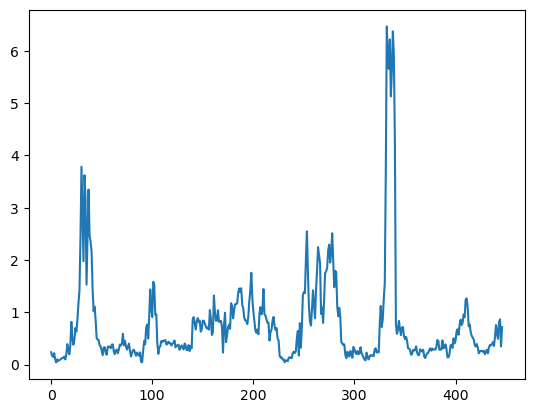

In [95]:
plt.plot(rmsd)